## Problem 317 - Firecracker

https://projecteuler.net/problem=317

The trajectories of a firecracker debris ejected at angle $\theta$ can be computed from:

$x = v \cos\theta t$  
$y = v \sin\theta t -\frac{1}{2} g t^2 + h$

where $v$ is the initial speed and $h$ the height, by
solving for $y$ by replacing $t = \frac{x}{v \cos\theta}$:

$y = x \tan\theta - \frac{g x^2}{2 v^2 \cos^2\theta} + h $

That can be rewritten as using a single trigonometric function:

$y = x \tan\theta - \frac{g x^2}{2 v^2}(1+\tan^2\theta) + h $

The expression can be refactorised with $\tan \theta = u$:

$y = x u - \frac{g x^2}{2 v^2}(1+u^2) + h $

In order to find the envelope of all trajectories, one can find the conditions for which the above quadratic equations as a function of $u$ has two coincident solutions: this would represent the farest reachabele points for the initial velocity $v$, and thus represent the envelop of the trajectories. The equation can be rewritten as quadratic equation in $u$, and by setting the discriminat to zero one finds:

$y = \frac{v^2}{2g} - \frac{g x^2}{2 v^2} + h$

Text(0, 0.5, 'f(x)')

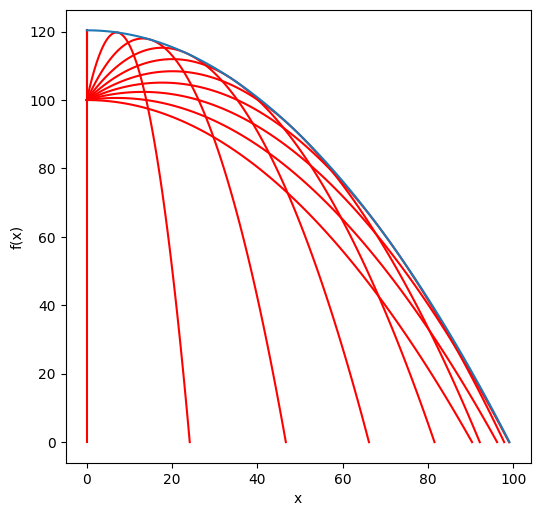

In [445]:
def ProjectilesTrajectory(x,th,v0=20,g=9.81,h0=100):
    '''Projectile trajectory as a function of angle th'''
    return x*np.tan(th)-g*x**2/(2.*v0**2*np.cos(th)**2)+h0

def x0pro(th,v0=20,g=9.81,h0=100):
    '''Positive zero crossing of projectile trajectory'''
    a = g/(2.*v0**2*np.cos(th)**2)
    b = -np.tan(th)
    c = -h0
    return (-b + np.sqrt(b**2 - 4.*a*c) )/(2.*a)

def ProjectilesEnvelope(x,v0=20,g=9.81,h0=100):
    '''Envelope of projectile trajectories'''
    return v0**2/(2.*g)-g*x**2/(2.*v0**2)+h0

def x0env(v0=20,g=9.81,h0=100):
    '''Positive zero crossing of envelope of projectile trajectories'''
    return np.sqrt( ( h0 + v0**2/(2.*g) ) * (2.*v0**2)/g ) 
    
fig = plt.figure(figsize=(6,6),dpi=100)

for a in np.linspace(0,np.pi/2,10):
    xa = np.linspace(0,x0pro(a),100)
    s = plt.plot(xa,ProjectilesTrajectory(xa,a),color="red")
    
x = np.linspace(0,x0env(),100)
s = plt.plot(x,ProjectilesEnvelope(x))

plt.xlabel('x')
plt.ylabel('f(x)')

In order to find the volume I need to compute:

$V = \pi \int_0^{y_0} f(y)^2 dy$

where $f(x)$ is the inverse of the envelope function:

$y = \frac{v^2}{2g} - \frac{g x^2}{2 v^2} + h \rightarrow
 x = f(y) = \sqrt{ \frac{2 v^2}{g} ( h - y + \frac{v^2}{2g}) } = \sqrt{2a(h+a/2-y)} = \sqrt{2ah + a^2 - 2ay}$

where $a=\frac{v^2}{g}$ and $y_0$ is the maximum of the curve, corresponding to the maximum height reached by the projectiles ejected vertically.

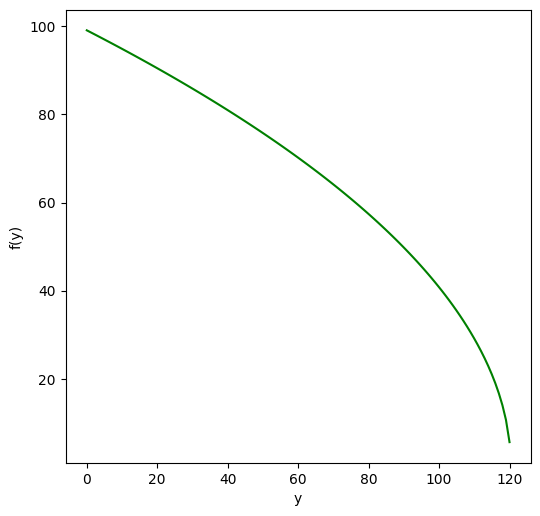

In [469]:
def InvEnvelope(y,v0=20,g=9.81,h0=100):
    a = v**2/g
    return np.sqrt(2.*a*h0 + a*a -2.*a*y)

fig = plt.figure(figsize=(6,6),dpi=100)
    
y = np.linspace(0,120,120)
s = plt.plot(y,InvEnvelope(y),color="g")
s = plt.xlabel('y')
s = plt.ylabel('f(y)')

In [470]:
y0 = ProjectilesEnvelope(0)
print(y0)

120.38735983690111


$V = \pi \int_0^{y_0} f(y)^2 dy = \int 2a(h+a/2-y) dy =  a (a y + 2 h y - y^2)$

In [471]:
def IntFy(y,v0=20,g=9.81,h0=100):
    a = v**2/g
    return a*(a*y+2.*h0*y-y**2)

In [472]:
V = np.pi*(IntFy(y0)-IntFy(0.))
print(V)

1856532.8455275737
